### Recurrent Neural Network

### Airline Passengers Prediction
International airline passengers prediction problem, where we are given a year and a month, and are required to predict the number of international airline passengers in units of 1,000. 
Dataset is downloaded from : 
https://www.kaggle.com/ssismasterchief/airline-passengers-prediction-lstm-keras/data

In [2]:
#------------------------------------------------------------------------
#****** Regression through LSTM using international airline passengers 
#
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# convert the array of values into a matrix (the format requireb by LSTM)
def create_dataset(dataset, time=1):
    data_X, data_Y = [], []
    for i in range(len(dataset)-time-1):
        a = dataset[i:(i+time), 0]
        data_X.append(a)
        data_Y.append(dataset[i + time, 0])
    
    return np.array(data_X), np.array(data_Y)


### Reshaping the data

An important note to keep in mind about LSTM is that they are sensitive to the scale of the input data. We normalize the data by rescaling it to the range of 0-to-1, we use MinMaxScaler preprocessing to normalize the dataset.

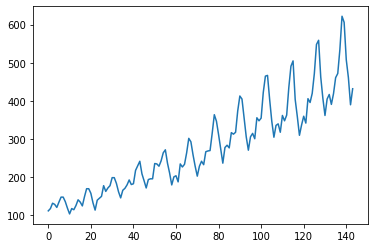

In [14]:
# loading the airline dataset
dataframe = pd.read_csv('international-airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
#dataset

dataset = dataset.astype('float32')
plt.plot(dataset)
plt.show()

# normalizing the data
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# spliting the data into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


### Create the dataset
Now we need a function that transfers our dataset into a:
dataset and the "time", where "time indicates the number of previous time-steps to use as input variables to predict the next time period (in this case the default is 1). 
This will create a dataset where train_X is the number of passengers at a given time (t) and teai_Y is the number of passengers at the next time (t+1). 


In [25]:
# LSTM networks require data to be presented in the bellow specific array structure:
# [samples, time steps, features]. That is why we are reshaping our data. 
time = 1
train_X, train_Y = create_dataset(train, time)
test_X, test_Y = create_dataset(test, time)

train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

(1, 1)

In [24]:
# Creating the LSTM network
model = Sequential()

#Large Short term memory network 
model.add(LSTM(4, input_shape=(1, time)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [5]:
# training and predictions
model.fit(train_X, train_Y, epochs=100, batch_size=1, verbose=1)
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

# inverting predictions
train_predict = scaler.inverse_transform(train_predict)
train_Y = scaler.inverse_transform([train_Y])

test_predict = scaler.inverse_transform(test_predict)
test_Y = scaler.inverse_transform([ test_Y ])


Train _performance: 22.74 RMSE
Test _performance: 48.99 RMSE


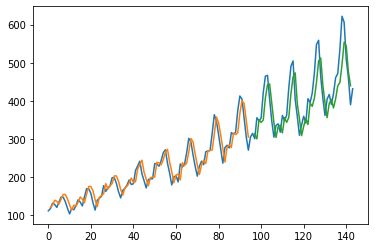

In [6]:
# calculate root mean squared error
train_score = math.sqrt(mean_squared_error(train_Y[0], train_predict[:,0]))
print('Train _performance: %.2f RMSE' % (train_score))

test_performance = math.sqrt(mean_squared_error(test_Y[0], test_predict[:,0]))
print('Test _performance: %.2f RMSE' % (test_performance))

#plotting train and test predictions 
train_plot = numpy.empty_like(dataset)
train_plot[:, :] = numpy.nan
train_plot[time:len(train_predict)+time, :] = train_predict

test_plot = numpy.empty_like(dataset)
test_plot[:, :] = numpy.nan
test_plot[len(train_predict)+(time*2)+1:len(dataset)-1, :] = test_predict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(train_plot)
plt.plot(test_plot)
plt.show()